In [1]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
allcol = pd.read_csv('train.csv')
allcol.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
#Below is an example of get_dummies usage to create categorical indicator variables for passenger class
allcol1 = allcol.join(pd.get_dummies(allcol['Pclass'],prefix='class'))
allcol1[['Pclass','class_1','class_2','class_3']]

,Pclass,class_1,class_2,class_3
0,3,0,0,1
1,1,1,0,0
2,3,0,0,1
3,1,1,0,0
4,3,0,0,1
...,...,...,...,...
886,2,0,1,0
887,1,1,0,0
888,3,0,0,1
889,1,1,0,0


In [225]:
#Create categorical indicator variables for the following in cat_cols:
cat_cols = ["Pclass","Parch","Embarked"]
data1 = allcol
for catvar in cat_cols:
    data1 = data1.join(pd.get_dummies(data1[catvar],prefix=catvar))
print(data1.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [226]:
#remove the columns that we made dummie variables for
cols = data1.columns.values.tolist()
keep_vars = [x for x in cols if x not in cat_cols]
data2 = data1[keep_vars]
data2.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Ticket',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Parch_0',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [227]:
#Select only certain columns to perform analysis on. We omit PassengerId, Name, SibSp, Ticket,Cabin,
data3 = data2[['Survived','Sex','Age','Fare','Pclass_1','Pclass_2', 'Pclass_3', 'Parch_0',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']]
data3 = data3.dropna()
data3 = data3.drop(['Survived'],axis=1)
data3['Female'] = data3['Sex'].apply(lambda x: 1 if x == 'female' else 0)
data3 = data3.drop(['Sex'],axis=1)
data3['Age'] = data3['Age'].mean() - data3['Age']
data3 = data3.apply((lambda x: (x - x.mean())/x.std(ddof=0)))

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

0.8041958041958042
             0         1
0          Age  0.422497
1         Fare  0.087289
2     Pclass_1  0.499491
3     Pclass_2  0.047309
4     Pclass_3 -0.479011
5      Parch_0 -0.013839
6      Parch_1  0.186934
7      Parch_2 -0.097773
8      Parch_3  0.032481
9      Parch_4 -0.326733
10     Parch_5 -0.051251
11     Parch_6 -0.178772
12  Embarked_C  0.019337
13  Embarked_Q -0.093933
14  Embarked_S -0.165702
15      Female  1.172017
16   Intercept -0.519037


<AxesSubplot:xlabel='0'>

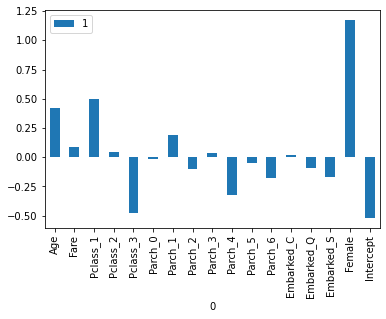

In [229]:
#This logstic model includes sex, plus other columns, its accuracy on the test set is about 80.4%
logisticRegr = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(data6,data3a['Survived'],test_size = 0.20,random_state=0)
logisticRegr.fit(x_train,y_train)
score = logisticRegr.score(x_test, y_test)
coefs = pd.DataFrame(list(zip(data6.columns,logisticRegr.coef_[0])))
coefs = coefs.append(pd.DataFrame.from_dict({0:'Intercept',1:logisticRegr.intercept_}),ignore_index=True)
print(score)
print(coefs)
coefs.plot.bar(x=0,y=1)

In [230]:
#This logistic regression model only uses sex as a feature and its accuracy on the test set
#is about 79.7%
data7 = np.array(data6['Female']).reshape(-1,1)
logisticRegr = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(data7,data3a['Survived'],test_size = 0.20,random_state=0)
logisticRegr.fit(x_train,y_train)
score = logisticRegr.score(x_test, y_test)
print(score)
print(logisticRegr.coef_)
print(logisticRegr.intercept_)

0.7972027972027972
[[1.14760121]]
[-0.47894096]


In [231]:
allcol.groupby('Parch').agg({"Survived":['count','mean']})

Survived          
         count      mean
Parch                   
0          678  0.343658
1          118  0.550847
2           80  0.500000
3            5  0.600000
4            4  0.000000
5            5  0.200000
6            1  0.000000

0.8111888111888111
             0         1
0          Age  0.406837
1         Fare  0.076208
2     Pclass_1  0.449057
3     Pclass_2  0.000000
4     Pclass_3 -0.530874
5      Parch_0  0.000000
6      Parch_1  0.194922
7      Parch_2 -0.072485
8      Parch_3  0.027530
9      Parch_4 -0.234731
10     Parch_5 -0.040077
11     Parch_6 -0.111435
12  Embarked_C  0.164721
13  Embarked_Q -0.005760
14  Embarked_S  0.000000
15      Female  1.167751
16   Intercept -0.499640


<AxesSubplot:xlabel='0'>

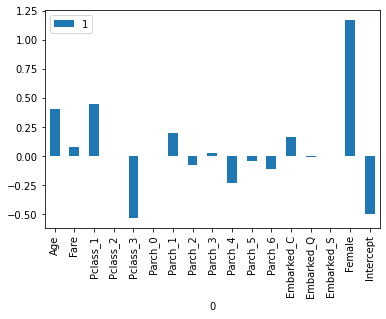

In [232]:
#This logstic model includes sex, plus other columns, its accuracy on the test set is about 81.1%
logisticRegr = LogisticRegression(penalty = 'l1',solver='liblinear')
x_train,x_test,y_train,y_test = train_test_split(data6,data3a['Survived'],test_size = 0.20,random_state=0)
logisticRegr.fit(x_train,y_train)
score = logisticRegr.score(x_test, y_test)
coefs = pd.DataFrame(list(zip(data6.columns,logisticRegr.coef_[0])))
coefs = coefs.append(pd.DataFrame.from_dict({0:'Intercept',1:logisticRegr.intercept_}),ignore_index=True)
print(score)
print(coefs)
coefs.plot.bar(x=0,y=1)